# Baseline train analysis

In [1]:
import os
import sys
import numpy as np
import pandas as pd

sys.path.append('../')

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# see the projects
!ls ../out/netruns/

exp_baseline_simplenet_cross_adam_ferp_001
exp_baseline_simplenet_cross_adam_mnist_001
exp_net_baseline_singlenet_001
exp_triplet_embsimplenet_hinge_adam_mnist_001


In [3]:
PROJECT='../out/netruns'
EXPNAME='exp_baseline_simplenet_cross_adam_mnist_001'

pathproject = os.path.join( PROJECT, EXPNAME )
pathprojectlog = os.path.join( PROJECT, EXPNAME, '{}.log'.format(EXPNAME) )

print(pathproject)
print(pathprojectlog)

../out/netruns/exp_baseline_simplenet_cross_adam_mnist_001
../out/netruns/exp_baseline_simplenet_cross_adam_mnist_001/exp_baseline_simplenet_cross_adam_mnist_001.log


In [8]:
# generate log
!python ../torchlib/tools/parse_log.py \
../out/netruns/exp_baseline_simplenet_cross_adam_mnist_001/exp_baseline_simplenet_cross_adam_mnist_001.log \
../out/netruns/exp_baseline_simplenet_cross_adam_mnist_001/

SAVE:  log_train.csv log_val.csv
DONE!!!


In [5]:
filenametrain = os.path.join( pathproject, 'log_{}.csv'.format( 'train' ) )
filenameval = os.path.join( pathproject, 'log_{}.csv'.format( 'val' ) )
print(filenametrain)
print(filenameval)

../out/netruns/exp_baseline_simplenet_cross_adam_mnist_001/log_train.csv
../out/netruns/exp_baseline_simplenet_cross_adam_mnist_001/log_val.csv


# Train analysis

In [6]:
train = pd.read_csv(filenametrain)
train.head()

,epoch,iter,loss,time,top1,top2,total,type
0,0,0,3.0809,4.9579,6.6667,15.0000,1000,Train
1,0,100,1.3016,0.0070,57.2607,72.9373,1000,Train
2,0,200,0.9563,0.0221,69.2289,82.2222,1000,Train
3,0,300,0.8039,0.0117,74.5792,86.0133,1000,Train
4,0,400,0.7040,0.0106,77.8928,88.2627,1000,Train


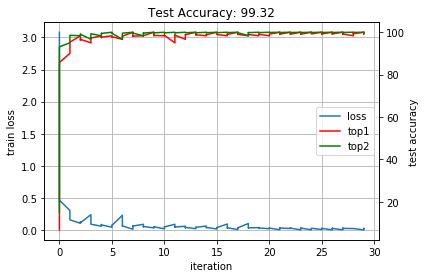

In [7]:

indx   = train['type']
xiter  = np.array(train['iter'])
xtop1  = np.array(train['top1'])
xtop2  = np.array(train['top2'])
xloss  = np.array(train['loss'])
xepoch = np.array(train['epoch'])

#plt.plot( xepoch, xtop1 )
#plt.plot( xepoch, xtop2 )
#plt.plot( xepoch, xloss )
#plt.show()

#plt.style.use('default')
#plt.style.use('classic')
#plt.style.use('ggplot')
#plt.style.use('fivethirtyeight')
#plt.style.use('dark_background')
#plt.style.context('Solarize_Light2')

_, ax1 = plt.subplots()
ax2 = ax1.twinx()
pl1 = ax1.plot(xepoch, xloss, label='loss')
pl2 = ax2.plot(xepoch, xtop1, 'r', label='top1')
pl3 = ax2.plot(xepoch, xtop2, 'g', label='top2')

ax1.set_xlabel('iteration')
ax1.set_ylabel('train loss')
ax2.set_ylabel('test accuracy')
ax2.set_title('Test Accuracy: {:.2f}'.format( xtop1[-1] ) )

#ax2.legend(loc='right')
lns = pl1+pl2+pl3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='right')

ax1.grid(True)

